In [1]:
from my_weapon import *
from tqdm import tqdm_notebook as tqdm
from fake_identify import Are_you_IRA

Putin = Are_you_IRA()

## retweet reply and mention 交互

In [ ]:
def num_of_interaction(G):
    print(G.number_of_nodes(), G.number_of_edges())
    freq_ira_as_n1 = []
    freq_ira_as_n2 = []
    freq_ira_toge = []

    for e in tqdm(G.edges(data=True)):
        if Putin.fuck(e[0]) and Putin.fuck(e[1]):
            freq_ira_toge.append(e[2]["weight"])
        if Putin.fuck(e[0]) and not Putin.fuck(e[1]):
            freq_ira_as_n1.append(e[2]["weight"])
        if Putin.fuck(e[1]) and not Putin.fuck(e[0]):
            freq_ira_as_n2.append(e[2]["weight"])

    freq_ira_as_n1 = pd.Series(freq_ira_as_n1)
    freq_ira_as_n2 = pd.Series(freq_ira_as_n2)
    freq_ira_toge = pd.Series(freq_ira_toge)
    
    print(freq_ira_as_n1.describe())
    freq_ira_as_n1.hist()
    plt.show()
    plt.close()
    print(freq_ira_as_n2.describe())
    freq_ira_as_n2.hist()
    plt.show()
    plt.close()
    print(freq_ira_toge.describe())
    
    return freq_ira_as_n1, freq_ira_as_n2

In [10]:
%matplotlib inline

def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

123368 240481



count    230320.000000
mean          2.464185
std           4.490389
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         202.000000
dtype: float64


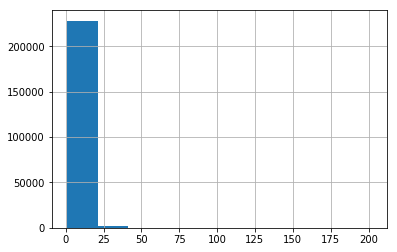

count    10411.000000
mean         1.309672
std          1.299213
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         57.000000
dtype: float64


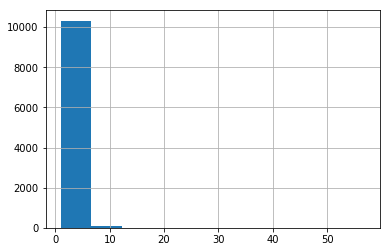

count    250.000000
mean       1.932000
std        2.617399
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       27.000000
dtype: float64


In [93]:
G = nx.read_gpickle("disk/ira-ret-SQL.gp")
freq_ira_as_n1, freq_ira_as_n2 = num_of_interaction(G)

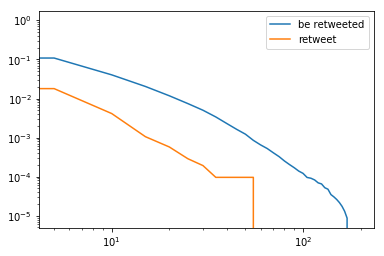

In [78]:
# plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(freq_ira_as_n1, 0, 200, 5)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='be retweeted')

x, cdf, pdf = get_cdf_pdf(freq_ira_as_n2, 0, 200, 5)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='retweet')
plt.legend()

11784 13773



count    13622.000000
mean         1.178828
std          0.659280
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
dtype: float64


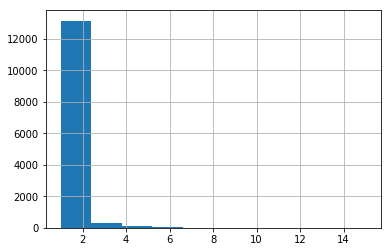

count    169.000000
mean       1.579882
std        3.397453
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       34.000000
dtype: float64


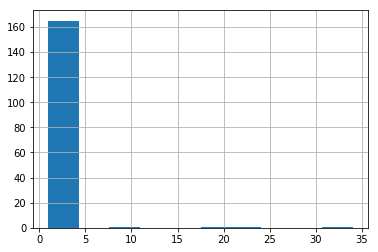

count    18.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
dtype: float64


In [94]:
G = nx.read_gpickle("disk/ira-rep-SQL.gp")
freq_ira_as_n1, freq_ira_as_n2 = num_of_interaction(G)

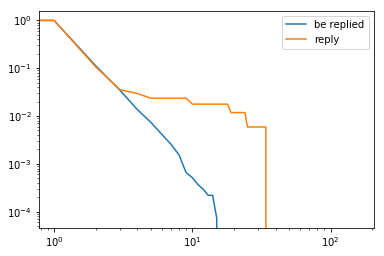

In [82]:
# plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(freq_ira_as_n1, 0, 160, 1)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='be replied')

x, cdf, pdf = get_cdf_pdf(freq_ira_as_n2, 0, 160, 1)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='reply')
plt.legend()

16854 22137



count    3858.000000
mean        1.707102
std         5.900898
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       206.000000
dtype: float64


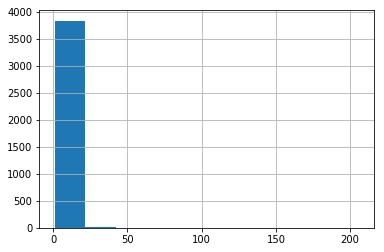

count    18311.000000
mean         1.391513
std          1.506045
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        107.000000
dtype: float64


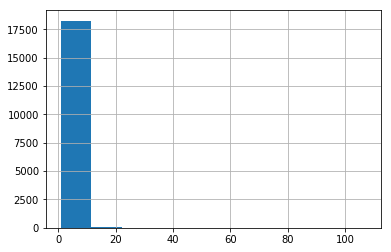

count    32.000000
mean      1.125000
std       0.421212
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       3.000000
dtype: float64


In [95]:
G = nx.read_gpickle("disk/ira-men-SQL.gp")
freq_ira_as_n1, freq_ira_as_n2 = num_of_interaction(G)

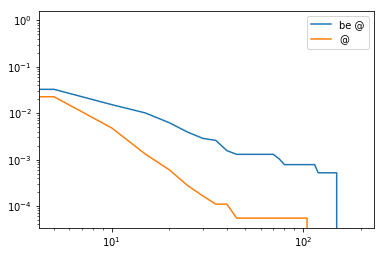

In [84]:
# plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(freq_ira_as_n1, 0, 200, 5)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='be @')

x, cdf, pdf = get_cdf_pdf(freq_ira_as_n2, 0, 200, 5)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='@')
plt.legend()

In [ ]:
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

In [3]:
from collections import defaultdict
users = {}

G = nx.read_gpickle("disk/ira-ret.gp")
for e in G.edges(data=True):
    if e[0] not in users:
        users[e[0]] = {"user_id": e[0], "in_rep": 0, "out_rep": 0, "in_men": 0, "out_men": 0, "in_ret": 0, "out_ret": 0}
    if e[1] not in users:
        users[e[1]] = {"user_id": e[1], "in_rep": 0, "out_rep": 0, "in_men": 0, "out_men": 0, "in_ret": 0, "out_ret": 0}
         
    if Putin.fuck(e[1]):   
        users[e[0]]["out_ret"] += e[2]["weight"]
    if Putin.fuck(e[0]):
        users[e[1]]["in_ret"] += e[2]["weight"]

G = nx.read_gpickle("disk/ira-rep.gp")
for e in G.edges(data=True):
    if e[0] not in users:
        users[e[0]] = {"user_id": e[0], "in_rep": 0, "out_rep": 0, "in_men": 0, "out_men": 0, "in_ret": 0, "out_ret": 0}
    if e[1] not in users:
        users[e[1]] = {"user_id": e[1], "in_rep": 0, "out_rep": 0, "in_men": 0, "out_men": 0, "in_ret": 0, "out_ret": 0}
    
    if Putin.fuck(e[1]):
        users[e[0]]["out_rep"] += e[2]["weight"]
    if Putin.fuck(e[0]):
        users[e[1]]["in_rep"] += e[2]["weight"]
    
G = nx.read_gpickle("disk/ira-men.gp")
for e in G.edges(data=True):
    if e[0] not in users:
        users[e[0]] = {"user_id": e[0], "in_rep": 0, "out_rep": 0, "in_men": 0, "out_men": 0, "in_ret": 0, "out_ret": 0}
    if e[1] not in users:
        users[e[1]] = {"user_id": e[1], "in_rep": 0, "out_rep": 0, "in_men": 0, "out_men": 0, "in_ret": 0, "out_ret": 0}
    
    if Putin.fuck(e[1]):
        users[e[0]]["out_men"] += e[2]["weight"]
    if Putin.fuck(e[0]):
        users[e[1]]["in_men"] += e[2]["weight"]
    
    
for uid in list(Putin.IRA_user_set):
    try:
        del users[uid]
    except:
        pass
    
users = pd.DataFrame(users).transpose()

count    58796.000000
mean         5.507654
std         40.305442
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       5064.000000
dtype: float64


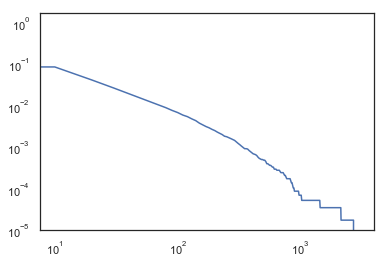

In [24]:
sns.set(style="white")

freq = pd.Series([v for v in users.in_men if v > 0])
print(freq.describe())
x, cdf, pdf = get_cdf_pdf(freq, 0, 3000, 10)
plt.yscale('log')
plt.xscale('log')
plt.plot(x, cdf)

count    14940.000000
mean         1.703079
std          2.101081
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        107.000000
dtype: float64


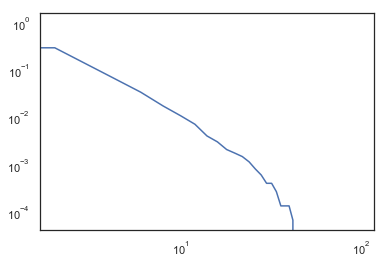

In [26]:
freq = pd.Series([v for v in users.out_men if v > 0])
print(freq.describe())
x, cdf, pdf = get_cdf_pdf(freq, 0, 100, 2)
plt.yscale('log')
plt.xscale('log')
plt.plot(x, cdf)

count    11542.000000
mean         1.389707
std          1.136590
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         29.000000
dtype: float64


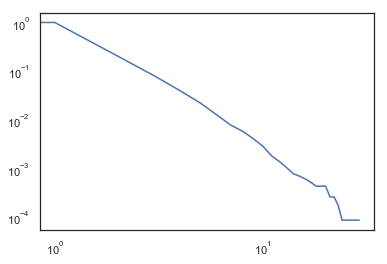

In [21]:
freq = pd.Series([v for v in users.in_rep if v > 0])
print(freq.describe())
x, cdf, pdf = get_cdf_pdf(freq, 0, 30, 1)
plt.yscale('log')
plt.xscale('log')
plt.plot(x, cdf)

count    2843.000000
mean        1.725642
std         6.680715
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       274.000000
dtype: float64


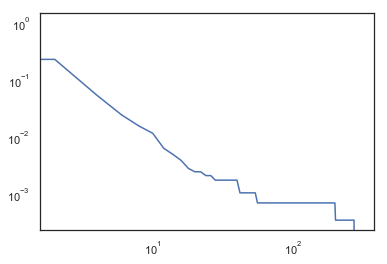

In [28]:
freq = pd.Series([v for v in users.out_rep if v > 0])
print(freq.describe())
x, cdf, pdf = get_cdf_pdf(freq, 0, 300, 2)
plt.yscale('log')
plt.xscale('log')
plt.plot(x, cdf)

count    120123.000000
mean          4.720728
std          10.208152
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         444.000000
dtype: float64


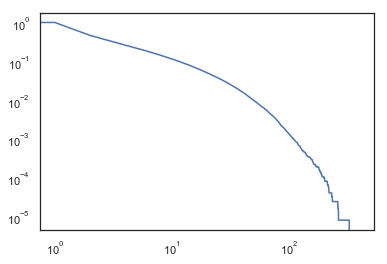

In [23]:
freq = pd.Series([v for v in users.in_ret if v > 0])
print(freq.describe())
x, cdf, pdf = get_cdf_pdf(freq, 0, 400, 1)
plt.yscale('log')
plt.xscale('log')
plt.plot(x, cdf)

count    42195.000000
mean         5.639768
std         29.152727
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       2766.000000
dtype: float64


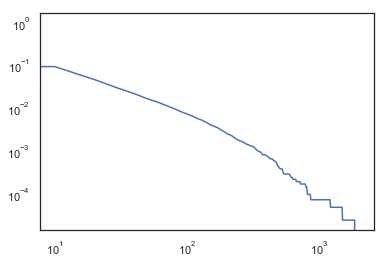

In [30]:
freq = pd.Series([v for v in users.out_ret if v > 0])
print(freq.describe())
x, cdf, pdf = get_cdf_pdf(freq, 0, 2000, 10)
plt.yscale('log')
plt.xscale('log')
plt.plot(x, cdf)